In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

root_path = "./GPT_eval_data/"

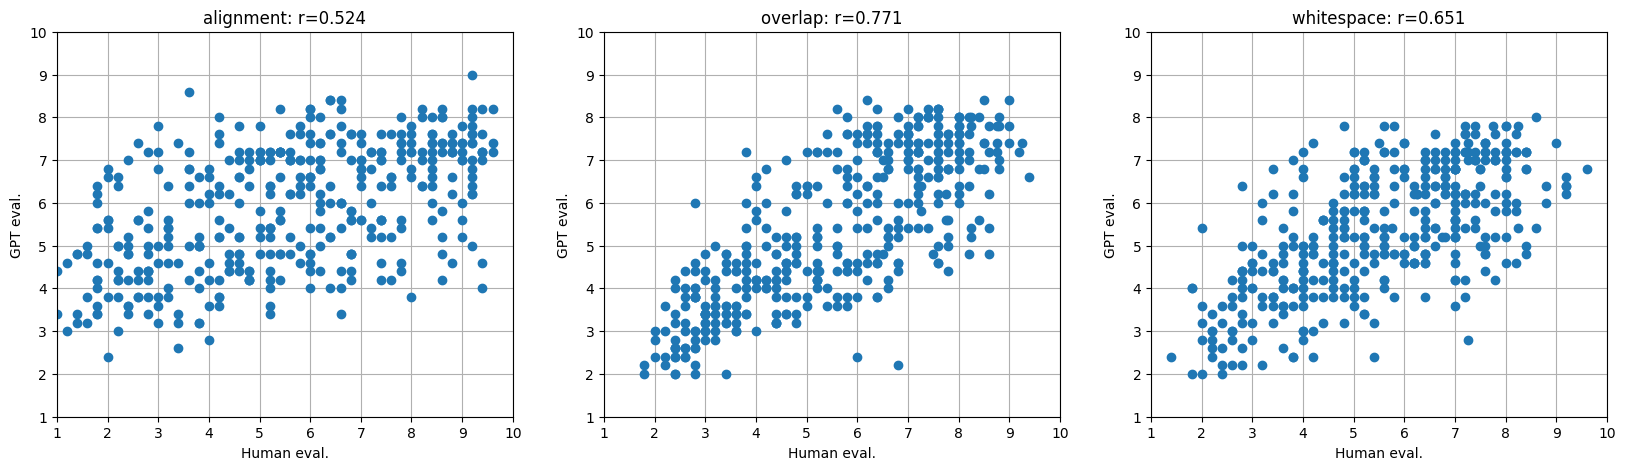

In [89]:
principle_list = ["alignment", "overlap", "whitespace"]
fig = plt.figure(figsize=(20, 5))
for idx, eval_principle in enumerate(principle_list):
    ax = fig.add_subplot(1, 3, 1 + idx)
    df_gpt = pd.read_csv(f"{root_path}/gpt_eval/gpt_abs_{eval_principle}.csv")
    df_gpt["human"] = 0.0
    df_human = pd.read_csv(f"{root_path}/human_eval/human_abs_{eval_principle}.csv")
    human_values = []
    for i in range(len(df_gpt)):
        data = df_gpt.loc[i]
        p_range = data["perturbation"]
        id_name = data["id"]
        df_gpt.loc[i, "human"] = df_human[
            (df_human["id"] == id_name) & (df_human["perturbation"] == p_range)
        ]["avg"].values[0]
    corrcoef = round(
        np.corrcoef([df_gpt["human"].values, df_gpt["avg"].values])[1][0], 3
    )
    ax.set_title(f"{eval_principle}: r={corrcoef}")
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.set_xlabel("Human eval.")
    ax.set_ylabel("GPT eval.")
    ax.grid(True, zorder=0)
    ax.scatter(df_gpt["human"].values, df_gpt["avg"].values, zorder=2)